# DECISION TREE CLASSIFICATION

In [166]:
from warnings import filterwarnings
filterwarnings('ignore')

# read data set file 

In [167]:
import pandas as pd 
df = pd.read_csv('iris.csv')

In [168]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [170]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [171]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Seprate X and Y 

In [172]:
X = df.drop(columns=['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [173]:
Y = df[['species']]
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# Create preprocessing pipeline for X 

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 



In [175]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [176]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [177]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [178]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [179]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# TRAIN TEST SPLIT 

In [180]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y, test_size=0.33,random_state= 2) 

In [181]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
36,-0.416010,1.019004,-1.397064,-1.315444
106,-1.143017,-1.282963,0.421734,0.659038
148,0.432165,0.788808,0.933271,1.448832
131,2.492019,1.709595,1.501645,1.053935
20,-0.537178,0.788808,-1.169714,-1.315444


In [182]:
xtrain.shape

(100, 4)

In [183]:
xtest.shape


(50, 4)

In [184]:
xtrain

,sepal_length,sepal_width,petal_length,petal_width
36,-0.416010,1.019004,-1.397064,-1.315444
106,-1.143017,-1.282963,0.421734,0.659038
148,0.432165,0.788808,0.933271,1.448832
131,2.492019,1.709595,1.501645,1.053935
20,-0.537178,0.788808,-1.169714,-1.315444
...,...,...,...,...
75,0.916837,-0.131979,0.364896,0.264142
43,-1.021849,1.019004,-1.226552,-0.788916
22,-1.506521,1.249201,-1.567576,-1.315444
72,0.553333,-1.282963,0.649083,0.395774


In [185]:
ytrain

,species
36,setosa
106,virginica
148,virginica
131,virginica
20,setosa
...,...
75,versicolor
43,setosa
22,setosa
72,versicolor


# Create a decision Tree Model

In [186]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, _tree

In [194]:
model = DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=3 , criterion='entropy' )
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=5)

In [196]:
model.score(xtrain, ytrain)

0.66

In [197]:
model.score(xtest, ytest)

0.68

# Hyperparameter Tunning

In [189]:
params = {'max_depth':[1,2,3,4,5,6],
          'min_samples_split':[5,6,7,8],
          'min_samples_leaf':[5,6,7,8],
          'criterion':['gini','entrophy']}

In [198]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv= GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8]},
             scoring='f1_macro')

In [199]:
gscv.best_score_

0.9713797313797314

In [200]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [201]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)

# Evaluate the model 

In [202]:
best_dtc.score(xtrain, ytrain)

0.97

In [204]:
best_dtc.score(xtest,ytest)

0.94

# predict the train test result

In [206]:
ypred_ts = model.predict(xtest)
ypred_ts[0:5]


array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa'], dtype=object)

In [208]:
ypred_tr = model.predict(xtrain)
ypred_tr[0:5]

array(['setosa', 'virginica', 'virginica', 'virginica', 'setosa'],
      dtype=object)

# CREATE A CONFUSION MATRIX

In [209]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix


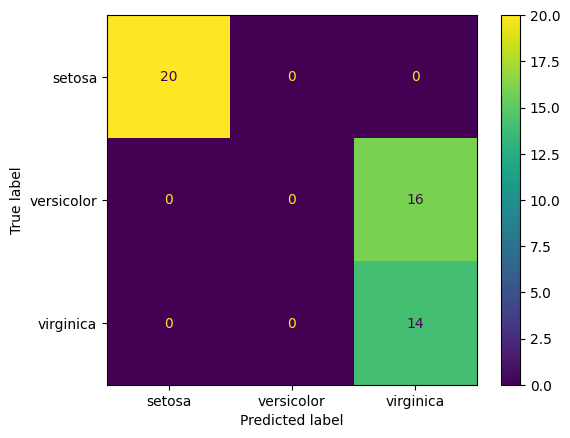

In [210]:
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_dtc.classes_)
cfd.plot()

# Print Classification Report 

In [211]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.00      0.00      0.00        16
   virginica       0.47      1.00      0.64        14

    accuracy                           0.68        50
   macro avg       0.49      0.67      0.55        50
weighted avg       0.53      0.68      0.58        50



# plotting THE DECISION TREEEE

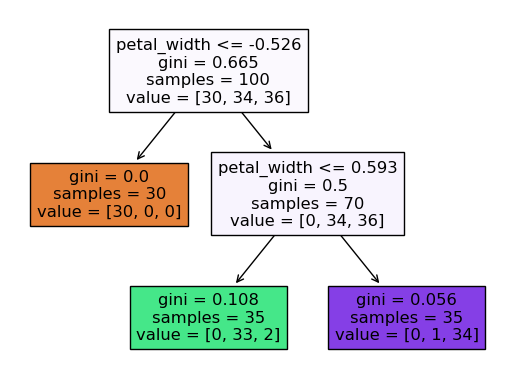

In [213]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plot_tree(best_dtc,feature_names= list(xtrain.columns), filled=True)
plt.show()

In [214]:
ytrain.value_counts()

species   
virginica     36
versicolor    34
setosa        30
Name: count, dtype: int64

# predicting out of sample data 

In [217]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [218]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  15 non-null     float64
 1   sepal_width   14 non-null     float64
 2   petal_length  14 non-null     float64
 3   petal_width   14 non-null     float64
dtypes: float64(4)
memory usage: 612.0 bytes


# Transform above data 

In [220]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182,  0.        , -0.08980313,  0.13250973],
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.        ],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571, -0.26238682],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [221]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


# Predict the species of each flower

In [224]:
pred = best_dtc.predict(xnew_pre)
pred

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [226]:
prob = best_dtc.predict_proba(xnew_pre)
prob

array([[0.        , 0.94285714, 0.05714286],
       [0.        , 0.02857143, 0.97142857],
       [0.        , 0.94285714, 0.05714286],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02857143, 0.97142857],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.02857143, 0.97142857],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.02857143, 0.97142857],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.94285714, 0.05714286]])

# Save the predict in xnew 

In [228]:
xnew['species_pred'] = pred
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,virginica
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,versicolor
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,versicolor


In [229]:
xnew['species_pred'].value_counts()

species_pred
versicolor    8
virginica     4
setosa        3
Name: count, dtype: int64

# Save the above file to csv

In [230]:
xnew.to_csv('DTCResults.csv',index=False)